In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../../data/cleaned_311.csv')

In [3]:
df.head()

,case_enquiry_id,open_dt,closed_dt,case_status,closure_reason,subject,reason,type,queue,department,...,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,...,Employee Generated,0.148900,2011,6,30,21,32,3,181,2
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,...,Self Service,0.162639,2011,6,30,22,18,3,181,2
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,...,Self Service,31.537292,2011,6,30,22,28,3,181,2
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,...,Self Service,21.548576,2011,6,30,23,3,3,181,2
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,...,Constituent Call,0.125081,2011,6,30,23,12,3,181,2


In [12]:
df_copy = df.copy(deep=True)

In [13]:
to_drop = [
    'case_enquiry_id',
    'case_status',
    'closure_reason',
    'longitude',
    'latitude',
    'resolution_time',
    'open_minute',
    'city_council_district',
    'neighborhood_services_district',
    'location_zipcode',
]

df.drop(columns=to_drop, inplace=True)

In [14]:
df.head()

,open_dt,closed_dt,subject,reason,type,queue,department,neighborhood,source,open_year,open_month,open_day,open_hour,open_dayofweek,open_dayofyear,open_quarter
0,2011-06-30 21:32:33,2011-07-01 01:06:58,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,Greater Mattapan,Employee Generated,2011,6,30,21,3,181,2
1,2011-06-30 22:18:31,2011-07-01 02:12:43,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,Roslindale,Self Service,2011,6,30,22,3,181,2
2,2011-06-30 22:28:04,2011-08-01 11:21:46,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,West Roxbury,Self Service,2011,6,30,22,3,181,2
3,2011-06-30 23:03:48,2011-07-22 12:13:45,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,Hyde Park,Self Service,2011,6,30,23,3,181,2
4,2011-06-30 23:12:31,2011-07-01 02:12:38,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,Dorchester,Constituent Call,2011,6,30,23,3,181,2


In [15]:
# drop rows with closed_dt < open_dt
df = df[df['closed_dt'] >= df['open_dt']]

In [16]:
df['resolution_time'] = pd.to_datetime(df['closed_dt']) - pd.to_datetime(df['open_dt'])

In [17]:
df.head()

,open_dt,closed_dt,subject,reason,type,queue,department,neighborhood,source,open_year,open_month,open_day,open_hour,open_dayofweek,open_dayofyear,open_quarter,resolution_time
0,2011-06-30 21:32:33,2011-07-01 01:06:58,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,Greater Mattapan,Employee Generated,2011,6,30,21,3,181,2,0 days 03:34:25
1,2011-06-30 22:18:31,2011-07-01 02:12:43,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,Roslindale,Self Service,2011,6,30,22,3,181,2,0 days 03:54:12
2,2011-06-30 22:28:04,2011-08-01 11:21:46,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,West Roxbury,Self Service,2011,6,30,22,3,181,2,31 days 12:53:42
3,2011-06-30 23:03:48,2011-07-22 12:13:45,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,Hyde Park,Self Service,2011,6,30,23,3,181,2,21 days 13:09:57
4,2011-06-30 23:12:31,2011-07-01 02:12:38,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,Dorchester,Constituent Call,2011,6,30,23,3,181,2,0 days 03:00:07


In [18]:
df.drop(columns=['closed_dt', 'open_dt'], inplace=True)

In [19]:
df.head()

,subject,reason,type,queue,department,neighborhood,source,open_year,open_month,open_day,open_hour,open_dayofweek,open_dayofyear,open_quarter,resolution_time
0,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,Greater Mattapan,Employee Generated,2011,6,30,21,3,181,2,0 days 03:34:25
1,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,Roslindale,Self Service,2011,6,30,22,3,181,2,0 days 03:54:12
2,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,West Roxbury,Self Service,2011,6,30,22,3,181,2,31 days 12:53:42
3,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,Hyde Park,Self Service,2011,6,30,23,3,181,2,21 days 13:09:57
4,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,Dorchester,Constituent Call,2011,6,30,23,3,181,2,0 days 03:00:07


In [20]:
# ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

to_encode = ['subject','reason','type','queue','department','source']

df[to_encode] = encoder.fit_transform(df[to_encode])

In [21]:
df.head()

,subject,reason,type,queue,department,neighborhood,source,open_year,open_month,open_day,open_hour,open_dayofweek,open_dayofyear,open_quarter,resolution_time
0,11.0,46.0,177.0,168.0,17.0,Greater Mattapan,3.0,2011,6,30,21,3,181,2,0 days 03:34:25
1,11.0,42.0,157.0,158.0,17.0,Roslindale,5.0,2011,6,30,22,3,181,2,0 days 03:54:12
2,12.0,44.0,92.0,19.0,4.0,West Roxbury,5.0,2011,6,30,22,3,181,2,31 days 12:53:42
3,11.0,46.0,177.0,173.0,17.0,Hyde Park,5.0,2011,6,30,23,3,181,2,21 days 13:09:57
4,11.0,27.0,63.0,116.0,17.0,Dorchester,2.0,2011,6,30,23,3,181,2,0 days 03:00:07


In [22]:
# convert resolution_time to seconds
df['resolution_time'] = df['resolution_time'].dt.total_seconds()

In [46]:
sampled_df = df.sample(frac=0.1, random_state=42)

train_X = sampled_df.drop(columns=['neighborhood'])
train_y = sampled_df['neighborhood']

In [47]:
print(f'Original shape: {df.shape}')
print(f'Sampled shape: {sampled_df.shape}')

Original shape: (2512425, 15)
Sampled shape: (251242, 15)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.3051603016975462


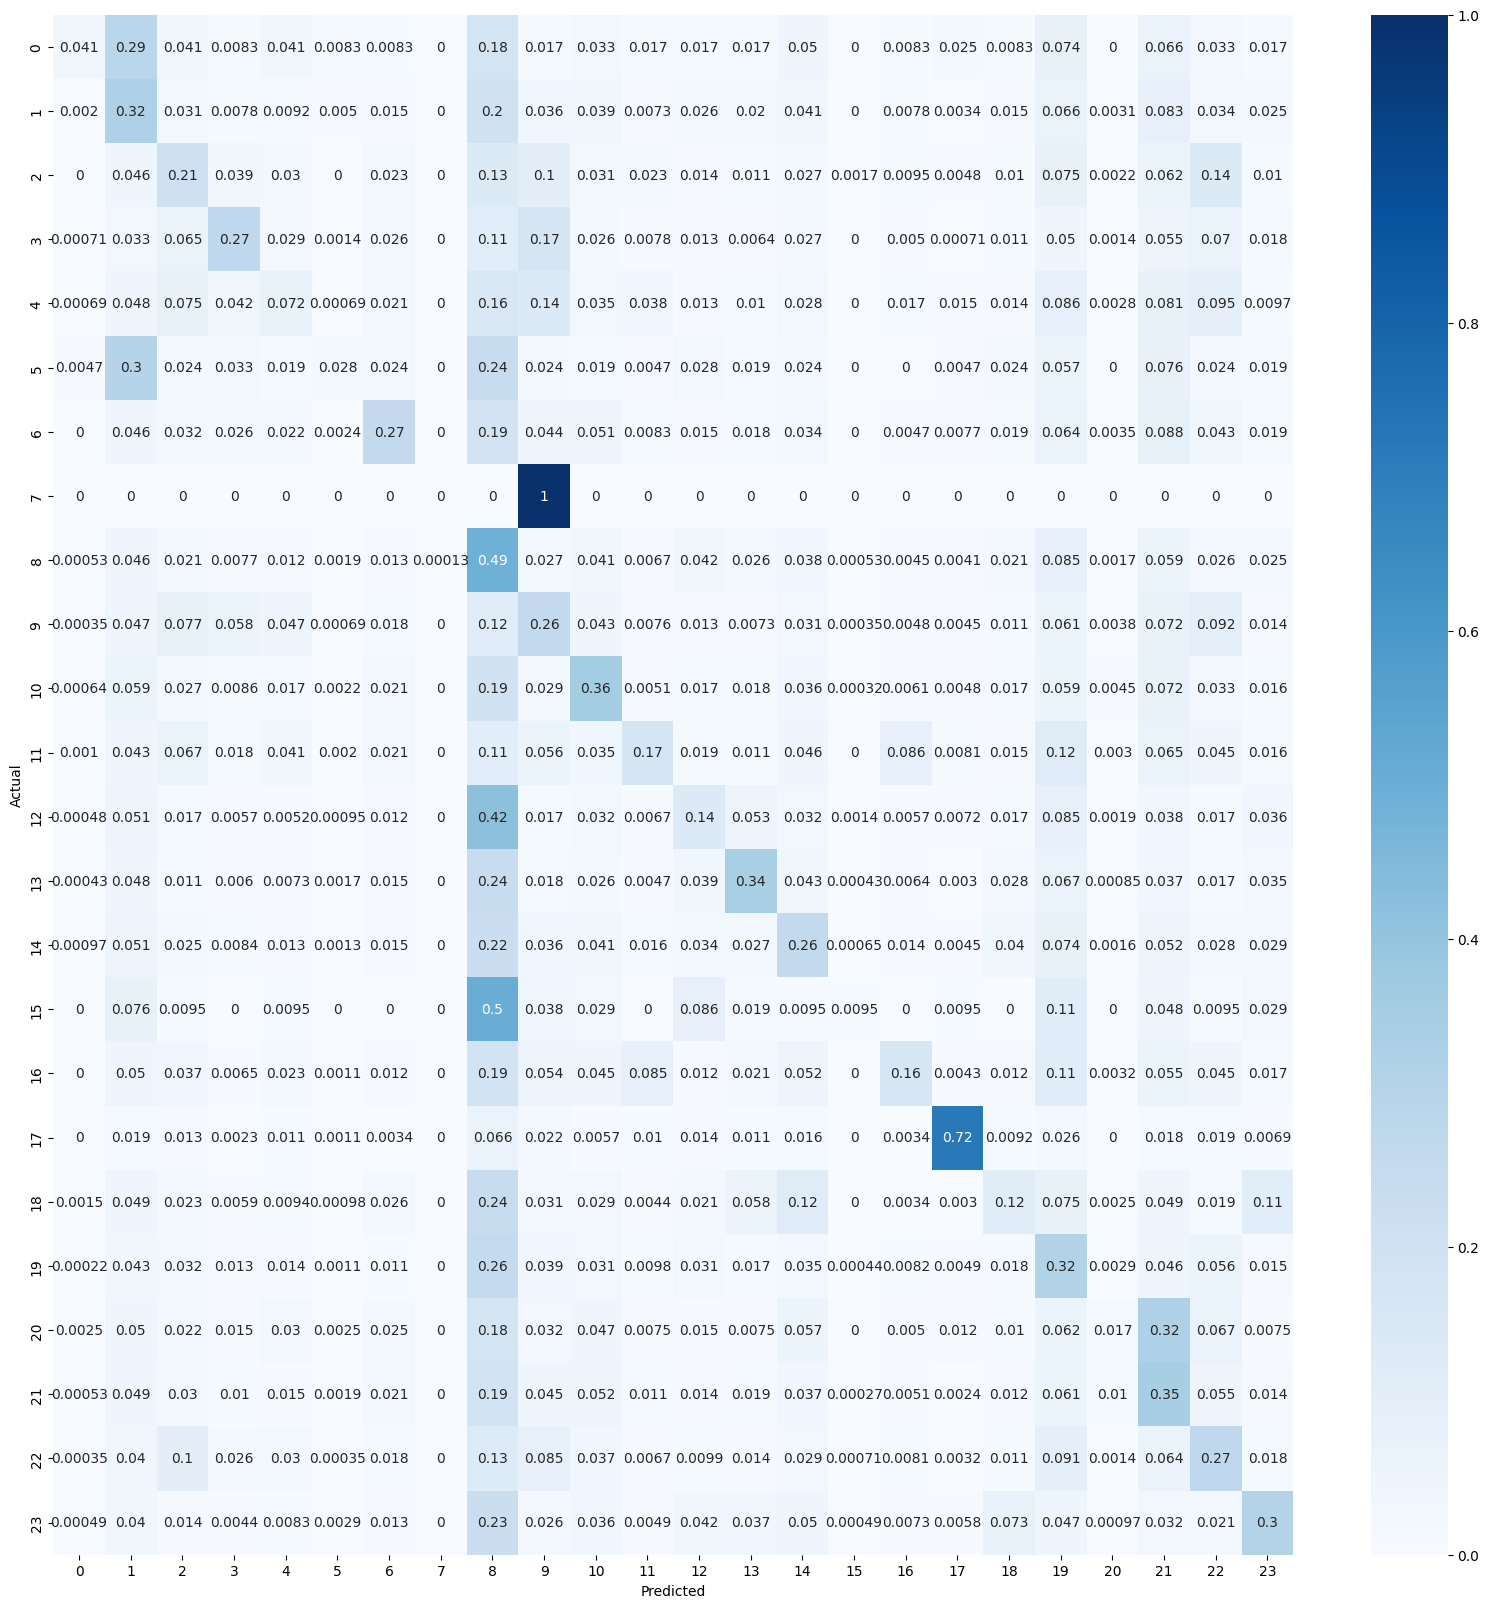

In [50]:
predicitions = rf.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predicitions)

print(f'Accuracy: {acc}')

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicitions, normalize='true')

plt.figure(figsize=(20, 20))

sns.heatmap(cm, annot=True, cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [51]:
# rfc features
features = rf.feature_importances_

feature_importances = pd.DataFrame(features, index=X_train.columns, columns=['Importance'])

feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

In [53]:
feature_importances

,Importance
resolution_time,0.195196
open_dayofyear,0.132545
open_hour,0.128415
open_day,0.123000
queue,0.107170
open_year,0.083774
open_dayofweek,0.075788
open_month,0.058171
type,0.029227
open_quarter,0.022555
